# Example Uses

Examples off how to use this. Also, a way for me to figure out what functionality I need to add in.

Do download CoverageTrends to parent directory; at some point I'll add the download dataset options

In [ ]:
# !git clone https://github.com/brockmanmatt/CoverageTrends.git ..

pointer to where coverage trends is

In [ ]:
!pip install --upgrade newstrends 

In [ ]:
ctd = CoverageTrendsDir = "../CoverageTrends"

In [ ]:
from newstrends import describe
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pickle

## I load all the articles into a describer

In [ ]:
holder = describe.describer()
holder.set_articleDir(path="../CoverageTrends")
holder.load_articles()

How many headlines are we looking at?

In [ ]:
len(holder.df)

2230515

How many of them are unique?

In [ ]:
holder.df.quickReplace.nunique()

90428

How many time stamps are there per day? Should be 48 pulling every 30 minutes but I broke the scraper a few times early on, but now it should be working fine

In [ ]:
holder.df.date = pd.to_datetime(holder.df.date)

In [ ]:
tmp = holder.df.date.unique()
tmp = pd.DataFrame(tmp)
tmp.set_index(0, inplace=True, drop=True)
tmp["count"] = 1

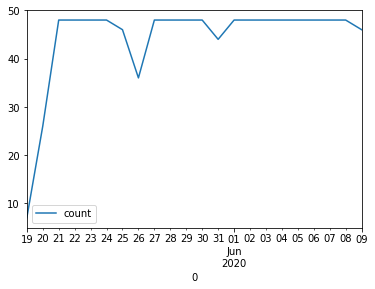

In [ ]:
tmp.resample("d").count().plot()

What are my publishers?

In [ ]:
holder.df.source.unique()

array(['yahoonews', 'businessinsider', 'nbcnews', 'politico', 'reuters',
       'abcnews', 'cnbc', 'dailybeast', 'bbc', 'foxnews', 'breitbart',
       'cnn', 'bostonglobe', 'chicagotribune', 'nypost', 'washingtonpost',
       'sanfransiscochronicle', 'aljazeera', 'nationalreview', 'rt',
       'nydailynews', 'newyorktimes', 'axios', 'livescience', 'forbes',
       'fortune', 'arstechnica', 'dailycaller', 'npr', 'slate', 'sputnik',
       'buzzfeed', 'techcrunch', 'newyorker', 'theatlantic'], dtype=object)

### We can just use pickle to save these for later use as well

In [ ]:
os.makedirs("tmp", exist_ok=True)
with open("tmp/holder.pkl", "wb") as fh:
    pickle.dump(holder, fh)

In [ ]:
holder = ""
type(holder)

str

In [ ]:
with open("tmp/holder.pkl", "rb") as fh:
    holder = pickle.load(fh)

In [ ]:
type(holder)

newstrends.describe.describer

In [ ]:
holder.df.source.unique()

array(['yahoonews', 'businessinsider', 'nbcnews', 'politico', 'reuters',
       'abcnews', 'cnbc', 'dailybeast', 'bbc', 'foxnews', 'breitbart',
       'cnn', 'bostonglobe', 'chicagotribune', 'nypost', 'washingtonpost',
       'sanfransiscochronicle', 'aljazeera', 'nationalreview', 'rt',
       'nydailynews', 'newyorktimes', 'axios', 'livescience', 'forbes',
       'fortune', 'arstechnica', 'dailycaller', 'npr', 'slate', 'sputnik',
       'buzzfeed', 'techcrunch', 'newyorker', 'theatlantic'], dtype=object)

## Let's look at similarity of coverage over time for some publications

To avoid loading data back in each time, I'll just load the loaded data into a new describer

In [ ]:
describer = describe.describer()
describer.load_article_holder(holder)

Let's use word2vec for this; I can save it to file if I want but I'll leave it

In [ ]:
describer.word2vec()

Now I just pull similarity over time for oh, I don't know, a couple random publications

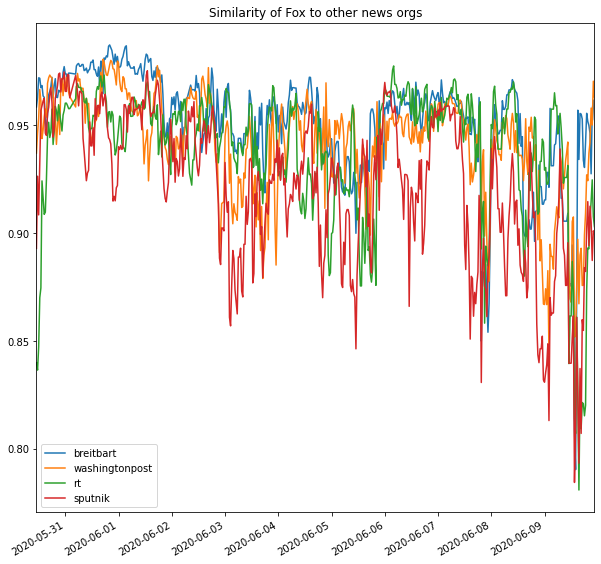

In [ ]:
similarityOverTime = describer.w2vSimilarityOverTime("foxnews", exogenous=["breitbart", "washingtonpost", "rt", "sputnik"], scope=500, keywords=["floyd", "protest", "riot", "police"])
fig, ax=plt.subplots(figsize=(10,10), facecolor="w")
similarityOverTime.T.plot(title="Similarity of Fox to other news orgs", ax=ax)
plt.show()


and we can do the same for RT and Sputnik

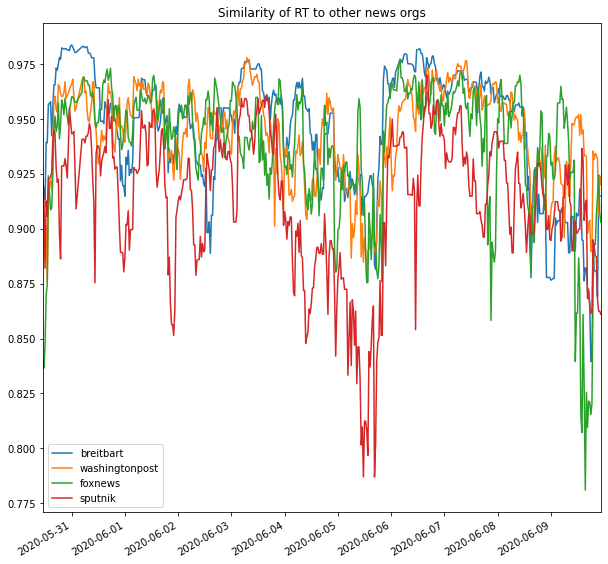

In [ ]:
similarityOverTime = describer.w2vSimilarityOverTime("rt", exogenous=["breitbart", "washingtonpost", "foxnews", "sputnik"], scope=500, keywords=["floyd", "protest", "riot", "police"])
fig, ax=plt.subplots(figsize=(10,10), facecolor="w")
similarityOverTime.T.plot(title="Similarity of RT to other news orgs", ax=ax)
plt.show()


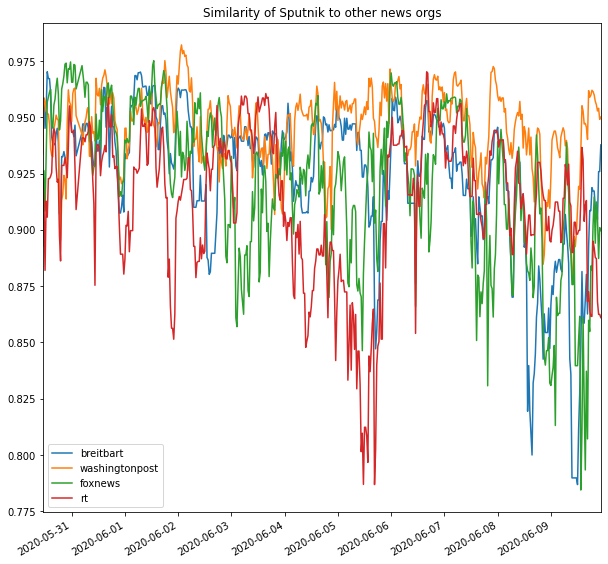

In [ ]:
similarityOverTime = describer.w2vSimilarityOverTime("sputnik", exogenous=["breitbart", "washingtonpost", "foxnews", "rt"], scope=500, keywords=["floyd", "protest", "riot", "police"])
fig, ax=plt.subplots(figsize=(10,10), facecolor="w")
similarityOverTime.T.plot(title="Similarity of Sputnik to other news orgs", ax=ax)
plt.show()
